In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and setup 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

# API Key Import
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

Generate Cities List

In [3]:
#Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df = pd.DataFrame(cities)
cities_df.rename(columns={0:"Cities"}, inplace = True)
cities_df


,Cities
0,punta arenas
1,hobart
2,avarua
3,castro
4,grand river south east
...,...
605,pontypridd
606,cumbitara
607,the valley
608,mamakan


Perform API Calls

   - Perform a weather check on each city using a series of successive API calls.
    - Include a print log of each city as it'sbeing processed (with the city number and city name).



In [4]:
for index, row in cities_df.iterrows():
    
    cities_df.loc[cities_df.index, "Cities"]
    
    weather_url = "http://api.openweathermap.org/data/2.5/weather?q="+cities[index]+"&units=imperial&appid="+api_key
    data_wea = requests.get(weather_url)
    response = data_wea.json()
    print(response)
    

{'coord': {'lon': -70.92, 'lat': -53.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 48.09, 'feels_like': 34.07, 'temp_min': 48, 'temp_max': 48.2, 'pressure': 1001, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 19.46, 'deg': 260}, 'clouds': {'all': 40}, 'dt': 1586636257, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1586604299, 'sunset': 1586642623}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
{'coord': {'lon': 147.33, 'lat': -42.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48.45, 'feels_like': 42.8, 'temp_min': 43, 'temp_max': 50, 'pressure': 1010, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1586636353, 'sys': {'type': 1, 'id': 9545, 'country': 'AU', 'sunrise': 1586637558, 'sunset': 1586677391}, 'timezo

{'coord': {'lon': 32.66, 'lat': 49.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41.11, 'feels_like': 30.9, 'temp_min': 41.11, 'temp_max': 41.11, 'pressure': 1025, 'humidity': 63, 'sea_level': 1025, 'grnd_level': 1011}, 'wind': {'speed': 11.16, 'deg': 353}, 'clouds': {'all': 2}, 'dt': 1586636277, 'sys': {'country': 'UA', 'sunrise': 1586574324, 'sunset': 1586622888}, 'timezone': 10800, 'id': 710473, 'name': 'Chyhyryn', 'cod': 200}
{'coord': {'lon': -114.35, 'lat': 62.46}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 16.3, 'feels_like': 2.89, 'temp_min': 15.8, 'temp_max': 17.01, 'pressure': 1027, 'humidity': 52}, 'visibility': 24140, 'wind': {'speed': 12.75, 'deg': 320, 'gust': 18.34}, 'clouds': {'all': 20}, 'dt': 1586636499, 'sys': {'type': 1, 'id': 1007, 'country': 'CA', 'sunrise': 1586607777, 'sunset': 1586659988}, 'timezone'

{'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.99, 'feels_like': 69.03, 'temp_min': 66.99, 'temp_max': 66.99, 'pressure': 1006, 'humidity': 91}, 'wind': {'speed': 5.23, 'deg': 70}, 'clouds': {'all': 77}, 'dt': 1586636501, 'sys': {'type': 3, 'id': 2011314, 'country': 'ZA', 'sunrise': 1586579508, 'sunset': 1586620473}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 77.4, 'feels_like': 76.89, 'temp_min': 77, 'temp_max': 78.01, 'pressure': 1019, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1586636501, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1586657959, 'sunset': 1586700006}, 'timezone': 14400, 'id': 934322, '

{'coord': {'lon': 12.65, 'lat': 43.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.09, 'feels_like': 54.86, 'temp_min': 53.6, 'temp_max': 60.8, 'pressure': 1021, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1586636504, 'sys': {'type': 1, 'id': 6770, 'country': 'IT', 'sunrise': 1586579573, 'sunset': 1586627243}, 'timezone': 7200, 'id': 3181277, 'name': 'Cagli', 'cod': 200}
{'coord': {'lon': -73.97, 'lat': 42.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 44.22, 'feels_like': 31.05, 'temp_min': 39.2, 'temp_max': 46.99, 'pressure': 1012, 'humidity': 42}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 290, 'gust': 25.28}, 'clouds': {'all': 75}, 'dt': 1586636280, 'sys': {'type': 1, 'id': 3273, 'country': 'US', 'sunrise': 1586600406, 'sunset': 1586647979}, 'timezone': -14400,

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 90.67, 'lat': 56.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 30.49, 'feels_like': 24.1, 'temp_min': 30.49, 'temp_max': 30.49, 'pressure': 1033, 'humidity': 93, 'sea_level': 1033, 'grnd_level': 1011}, 'wind': {'speed': 4.21, 'deg': 84}, 'clouds': {'all': 0}, 'dt': 1586636508, 'sys': {'country': 'RU', 'sunrise': 1586645801, 'sunset': 1586696340}, 'timezone': 25200, 'id': 1508260, 'name': 'Novobirilyussy', 'cod': 200}
{'coord': {'lon': -70.2, 'lat': -22.09}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.37, 'feels_like': 77.13, 'temp_min': 80.37, 'temp_max': 80.37, 'pressure': 1014, 'humidity': 33, 'sea_level': 1014, 'grnd_level': 1010}, 'wind': {'speed': 5.26, 'deg': 260}, 'clouds': {'all': 18}, 'dt': 1586636508, 'sys': {'country': 'CL', 'sunrise': 1586602311, 'su

{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 83.98, 'feels_like': 87.15, 'temp_min': 83.98, 'temp_max': 83.98, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 1012}, 'wind': {'speed': 13.35, 'deg': 94}, 'rain': {'3h': 1.15}, 'clouds': {'all': 95}, 'dt': 1586636509, 'sys': {'country': 'KI', 'sunrise': 1586629451, 'sunset': 1586673280}, 'timezone': 43200, 'id': 2110227, 'name': 'Butaritari', 'cod': 200}
{'coord': {'lon': 97.2, 'lat': 40.28}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 45.43, 'feels_like': 36.82, 'temp_min': 45.43, 'temp_max': 45.43, 'pressure': 1021, 'humidity': 23, 'sea_level': 1021, 'grnd_level': 857}, 'wind': {'speed': 5.01, 'deg': 91}, 'clouds': {'all': 100}, 'dt': 1586636509, 'sys': {'country': 'CN', 'sunrise': 1586645838, 'sunset': 1586693170}, '

{'coord': {'lon': -46.05, 'lat': 60.92}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 48.2, 'feels_like': 21.97, 'temp_min': 48.2, 'temp_max': 48.2, 'pressure': 1007, 'humidity': 26}, 'wind': {'speed': 36.91, 'deg': 60, 'gust': 53.02}, 'snow': {'3h': 0.14}, 'clouds': {'all': 100}, 'dt': 1586636512, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'sunrise': 1586591705, 'sunset': 1586643282}, 'timezone': -7200, 'id': 3421719, 'name': 'Narsaq', 'cod': 200}
{'coord': {'lon': -171, 'lat': 65.58}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 31.35, 'feels_like': 21.25, 'temp_min': 31.35, 'temp_max': 31.35, 'pressure': 1016, 'humidity': 98, 'sea_level': 1016, 'grnd_level': 1014}, 'wind': {'speed': 11.3, 'deg': 186}, 'snow': {'3h': 0.32}, 'clouds': {'all': 94}, 'dt': 1586636512, 'sys': {'country': 'RU', 'sunrise': 1586706822, 'sunset': 158676

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -175.2, 'lat': -21.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 80.53, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 20}, 'dt': 1586636514, 'sys': {'type': 1, 'id': 7285, 'country': 'TO', 'sunrise': 1586713900, 'sunset': 1586755837}, 'timezone': 46800, 'id': 4032243, 'name': 'Vaini', 'cod': 200}
{'coord': {'lon': -91.75, 'lat': 29.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.26, 'feels_like': 74.61, 'temp_min': 75.2, 'temp_max': 80.6, 'pressure': 1013, 'humidity': 51}, 'visibility': 16093, 'wind': {'speed': 11.41, 'deg': 140, 'gust': 23.04}, 'clouds': {'all': 1}, 'dt': 1586636514, 'sys': {'type': 1, 'id': 3312, 'country': 'US', 'sunrise': 1586605429, 

{'coord': {'lon': -126.83, 'lat': 65.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.6, 'feels_like': 13.57, 'temp_min': 26.6, 'temp_max': 26.6, 'pressure': 1035, 'humidity': 68}, 'visibility': 48279, 'wind': {'speed': 13.87, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1586636517, 'sys': {'type': 1, 'id': 951, 'country': 'CA', 'sunrise': 1586610152, 'sunset': 1586663602}, 'timezone': -21600, 'id': 6089245, 'name': 'Norman Wells', 'cod': 200}
{'coord': {'lon': -104.7, 'lat': 19.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86, 'feels_like': 87.69, 'temp_min': 86, 'temp_max': 86, 'pressure': 1011, 'humidity': 74}, 'visibility': 16093, 'wind': {'speed': 17.22, 'deg': 270}, 'clouds': {'all': 20}, 'dt': 1586636517, 'sys': {'type': 1, 'id': 7166, 'country': 'MX', 'sunrise': 1586609028, 'sunset': 1586654105}, 'timezone': -180

{'coord': {'lon': 116.85, 'lat': -20.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.37, 'feels_like': 80.33, 'temp_min': 81.37, 'temp_max': 81.37, 'pressure': 1012, 'humidity': 50, 'sea_level': 1012, 'grnd_level': 1008}, 'wind': {'speed': 8.28, 'deg': 159}, 'clouds': {'all': 0}, 'dt': 1586636227, 'sys': {'country': 'AU', 'sunrise': 1586643773, 'sunset': 1586685804}, 'timezone': 28800, 'id': 6620339, 'name': 'Karratha', 'cod': 200}
{'coord': {'lon': 29.83, 'lat': 9.23}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 91.62, 'feels_like': 88.61, 'temp_min': 91.62, 'temp_max': 91.62, 'pressure': 1007, 'humidity': 22, 'sea_level': 1007, 'grnd_level': 963}, 'wind': {'speed': 4.25, 'deg': 91}, 'clouds': {'all': 73}, 'dt': 1586636520, 'sys': {'country': 'SS', 'sunrise': 1586577149, 'sunset': 1586621422}, 'timezone': 10800, 'id': 37

{'coord': {'lon': 141.96, 'lat': 43.04}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 26.58, 'feels_like': 18.79, 'temp_min': 24.8, 'temp_max': 28.99, 'pressure': 1016, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 340}, 'clouds': {'all': 40}, 'dt': 1586636521, 'sys': {'type': 1, 'id': 7973, 'country': 'JP', 'sunrise': 1586634911, 'sunset': 1586682616}, 'timezone': 32400, 'id': 2127419, 'name': 'Yūbari', 'cod': 200}
{'coord': {'lon': -103.67, 'lat': 41.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.72, 'feels_like': 54.81, 'temp_min': 60.8, 'temp_max': 66.2, 'pressure': 1002, 'humidity': 29}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 300, 'gust': 18.34}, 'clouds': {'all': 1}, 'dt': 1586636365, 'sys': {'type': 1, 'id': 3415, 'country': 'US', 'sunrise': 1586607578, 'sunset': 1586655061}, 

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 12.78, 'lat': 26.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.97, 'feels_like': 63.07, 'temp_min': 72.97, 'temp_max': 72.97, 'pressure': 1016, 'humidity': 19, 'sea_level': 1016, 'grnd_level': 963}, 'wind': {'speed': 10.33, 'deg': 108}, 'clouds': {'all': 0}, 'dt': 1586636523, 'sys': {'country': 'LY', 'sunrise': 1586580524, 'sunset': 1586626229}, 'timezone': 7200, 'id': 2219235, 'name': 'Ubari', 'cod': 200}
{'coord': {'lon': 102.27, 'lat': -3.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 78.55, 'feels_like': 85.32, 'temp_min': 78.55, 'temp_max': 78.55, 'pressure': 1010, 'humidity': 81, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 3.58, 'deg': 91}, 'clouds': {'all': 37}, 'dt': 1586636226, 'sys': {'country': 'ID', 'sunrise': 1586646626, 'sunset

{'coord': {'lon': 12.37, 'lat': -6.13}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 80.62, 'feels_like': 89.2, 'temp_min': 80.62, 'temp_max': 80.62, 'pressure': 1011, 'humidity': 86, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 4.23, 'deg': 242}, 'rain': {'3h': 0.6}, 'clouds': {'all': 98}, 'dt': 1586636525, 'sys': {'country': 'AO', 'sunrise': 1586581893, 'sunset': 1586625058}, 'timezone': 3600, 'id': 2236967, 'name': 'Soyo', 'cod': 200}
{'coord': {'lon': -68.9, 'lat': -5.18}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.47, 'feels_like': 93.36, 'temp_min': 82.47, 'temp_max': 82.47, 'pressure': 1008, 'humidity': 86, 'sea_level': 1008, 'grnd_level': 997}, 'wind': {'speed': 2.13, 'deg': 270}, 'rain': {'3h': 4.05}, 'clouds': {'all': 79}, 'dt': 1586636525, 'sys': {'country': 'BR', 'sunrise': 1586601362, 'sunset': 1586

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 167.48, 'lat': -22.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 76.19, 'feels_like': 73.8, 'temp_min': 76.19, 'temp_max': 76.19, 'pressure': 1014, 'humidity': 74, 'sea_level': 1014, 'grnd_level': 1008}, 'wind': {'speed': 15.46, 'deg': 335}, 'clouds': {'all': 27}, 'dt': 1586636528, 'sys': {'country': 'NC', 'sunrise': 1586631699, 'sunset': 1586673581}, 'timezone': 39600, 'id': 2137773, 'name': 'Vao', 'cod': 200}
{'coord': {'lon': -135.33, 'lat': 57.05}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 42.51, 'feels_like': 35.11, 'temp_min': 41, 'temp_max': 42.8, 'pressure': 1032, 'humidity': 56}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 300}, 'clouds': {'all': 20}, 'dt': 1586636528, 'sys': {'type': 1, 'id': 7795, 'country': 'US', 'sunrise': 1586613687,

{'coord': {'lon': -8.33, 'lat': 40.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 56.91, 'feels_like': 53.96, 'temp_min': 53.01, 'temp_max': 60.01, 'pressure': 1019, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1586636388, 'sys': {'type': 1, 'id': 6896, 'country': 'PT', 'sunrise': 1586584838, 'sunset': 1586632046}, 'timezone': 3600, 'id': 2738381, 'name': 'Lata', 'cod': 200}
{'coord': {'lon': 105.16, 'lat': 54.81}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 35.78, 'feels_like': 29.23, 'temp_min': 35.78, 'temp_max': 35.78, 'pressure': 1031, 'humidity': 76, 'sea_level': 1031, 'grnd_level': 980}, 'wind': {'speed': 4.54, 'deg': 338}, 'snow': {'3h': 2.14}, 'clouds': {'all': 100}, 'dt': 1586636533, 'sys': {'country': 'RU', 'sunrise': 1586642610, 'sunset': 1586692577}, 'timezon

{'coord': {'lon': -74.85, 'lat': 49.78}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 28.4, 'feels_like': 15.37, 'temp_min': 28.4, 'temp_max': 28.4, 'pressure': 1003, 'humidity': 63}, 'visibility': 14484, 'wind': {'speed': 13.87, 'deg': 290, 'gust': 23.04}, 'clouds': {'all': 90}, 'dt': 1586636534, 'sys': {'type': 1, 'id': 859, 'country': 'CA', 'sunrise': 1586600025, 'sunset': 1586648783}, 'timezone': -14400, 'id': 5919850, 'name': 'Chapais', 'cod': 200}
{'coord': {'lon': -84.36, 'lat': 34.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.4, 'feels_like': 61.74, 'temp_min': 66.2, 'temp_max': 73, 'pressure': 1017, 'humidity': 22}, 'visibility': 16093, 'wind': {'speed': 6.51, 'deg': 160}, 'clouds': {'all': 1}, 'dt': 1586636387, 'sys': {'type': 1, 'id': 5323, 'country': 'US', 'sunrise': 1586603440, 'sunset': 1586649932}, 'timezone': 

{'coord': {'lon': 20.97, 'lat': 70.03}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 32.23, 'feels_like': 21.11, 'temp_min': 32.23, 'temp_max': 32.23, 'pressure': 1009, 'humidity': 95, 'sea_level': 1009, 'grnd_level': 1009}, 'wind': {'speed': 13.13, 'deg': 190}, 'snow': {'3h': 2.09}, 'clouds': {'all': 100}, 'dt': 1586636538, 'sys': {'country': 'NO', 'sunrise': 1586573355, 'sunset': 1586629468}, 'timezone': 7200, 'id': 777682, 'name': 'Skjervøy', 'cod': 200}
{'coord': {'lon': 10.73, 'lat': 10.37}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 86.2, 'feels_like': 80.28, 'temp_min': 86.2, 'temp_max': 86.2, 'pressure': 1011, 'humidity': 14, 'sea_level': 1011, 'grnd_level': 975}, 'wind': {'speed': 4.03, 'deg': 66}, 'clouds': {'all': 100}, 'dt': 1586636538, 'sys': {'country': 'NG', 'sunrise': 1586581689, 'sunset': 1586626049}, 'timezone':

{'coord': {'lon': -40.29, 'lat': -20.33}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.18, 'feels_like': 80.47, 'temp_min': 75.99, 'temp_max': 79, 'pressure': 1014, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 170}, 'clouds': {'all': 75}, 'dt': 1586636540, 'sys': {'type': 1, 'id': 8474, 'country': 'BR', 'sunrise': 1586595060, 'sunset': 1586637162}, 'timezone': -10800, 'id': 3445026, 'name': 'Vila Velha', 'cod': 200}
{'coord': {'lon': 99.94, 'lat': 9.54}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.15, 'feels_like': 88.16, 'temp_min': 84.15, 'temp_max': 84.15, 'pressure': 1010, 'humidity': 70, 'sea_level': 1010, 'grnd_level': 1008}, 'wind': {'speed': 9.51, 'deg': 138}, 'clouds': {'all': 20}, 'dt': 1586636540, 'sys': {'country': 'TH', 'sunrise': 1586646686, 'sunset': 1586691007}, 'timezone': 25200

{'coord': {'lon': 114.98, 'lat': 27.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 49.69, 'feels_like': 44.67, 'temp_min': 49.69, 'temp_max': 49.69, 'pressure': 1025, 'humidity': 82, 'sea_level': 1025, 'grnd_level': 1016}, 'wind': {'speed': 6.62, 'deg': 347}, 'clouds': {'all': 73}, 'dt': 1586636541, 'sys': {'country': 'CN', 'sunrise': 1586642327, 'sunset': 1586688148}, 'timezone': 28800, 'id': 1806445, 'name': 'Ji’an', 'cod': 200}
{'coord': {'lon': 36.89, 'lat': -17.88}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 83.19, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1016, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 0.63, 'deg': 83}, 'clouds': {'all': 20}, 'dt': 1586636541, 'sys': {'type': 1, 'id': 2208, 'country': 'MZ', 'sunrise': 1586576439, 'sunset': 1586618744}, 'timezone': 7200, 'id':

{'coord': {'lon': 167.55, 'lat': -13.88}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.82, 'feels_like': 81.93, 'temp_min': 80.82, 'temp_max': 80.82, 'pressure': 1013, 'humidity': 72, 'sea_level': 1013, 'grnd_level': 1006}, 'wind': {'speed': 12.41, 'deg': 107}, 'clouds': {'all': 45}, 'dt': 1586636542, 'sys': {'country': 'VU', 'sunrise': 1586631334, 'sunset': 1586673912}, 'timezone': 39600, 'id': 2134814, 'name': 'Sola', 'cod': 200}
{'coord': {'lon': -121.42, 'lat': 38.42}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.91, 'feels_like': 58.89, 'temp_min': 57.99, 'temp_max': 66, 'pressure': 1017, 'humidity': 72}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 220}, 'clouds': {'all': 75}, 'dt': 1586636543, 'sys': {'type': 1, 'id': 5769, 'country': 'US', 'sunrise': 1586612064, 'sunset': 1586659094}, 'timezone': -2

{'coord': {'lon': -9.24, 'lat': 32.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 62.53, 'feels_like': 56.64, 'temp_min': 62.53, 'temp_max': 62.53, 'pressure': 1017, 'humidity': 81, 'sea_level': 1017, 'grnd_level': 1015}, 'wind': {'speed': 14.14, 'deg': 11}, 'clouds': {'all': 90}, 'dt': 1586636544, 'sys': {'country': 'MA', 'sunrise': 1586585521, 'sunset': 1586631801}, 'timezone': 3600, 'id': 2537881, 'name': 'Safi', 'cod': 200}
{'coord': {'lon': 72.64, 'lat': 10.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.34, 'feels_like': 91.47, 'temp_min': 84.34, 'temp_max': 84.34, 'pressure': 1010, 'humidity': 68, 'sea_level': 1010, 'grnd_level': 1009}, 'wind': {'speed': 3.31, 'deg': 4}, 'clouds': {'all': 0}, 'dt': 1586636392, 'sys': {'country': 'IN', 'sunrise': 1586653196, 'sunset': 1586697599}, 'timezone': 19800, 'id': 1267390

{'coord': {'lon': 16.34, 'lat': -9.54}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 65.53, 'feels_like': 65.73, 'temp_min': 65.53, 'temp_max': 65.53, 'pressure': 1014, 'humidity': 70, 'sea_level': 1014, 'grnd_level': 889}, 'wind': {'speed': 2.66, 'deg': 119}, 'rain': {'3h': 1.61}, 'clouds': {'all': 92}, 'dt': 1586636547, 'sys': {'country': 'AO', 'sunrise': 1586581062, 'sunset': 1586623983}, 'timezone': 3600, 'id': 2239862, 'name': 'Malanje', 'cod': 200}
{'coord': {'lon': 90.22, 'lat': 25.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.18, 'feels_like': 67.59, 'temp_min': 72.18, 'temp_max': 72.18, 'pressure': 1009, 'humidity': 32, 'sea_level': 1009, 'grnd_level': 966}, 'wind': {'speed': 4.45, 'deg': 136}, 'clouds': {'all': 0}, 'dt': 1586636547, 'sys': {'country': 'IN', 'sunrise': 1586648342, 'sunset': 1586694016}, 'timezone': 1

{'coord': {'lon': -24.98, 'lat': 16.89}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 72.46, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1015, 'humidity': 73}, 'visibility': 8000, 'wind': {'speed': 14.99, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1586636551, 'sys': {'type': 1, 'id': 2467, 'country': 'CV', 'sunrise': 1586590002, 'sunset': 1586634873}, 'timezone': -3600, 'id': 3374462, 'name': 'Mindelo', 'cod': 200}
{'coord': {'lon': 70.66, 'lat': 28.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 84.92, 'feels_like': 82.56, 'temp_min': 84.92, 'temp_max': 84.92, 'pressure': 1010, 'humidity': 27, 'sea_level': 1010, 'grnd_level': 1000}, 'wind': {'speed': 3.04, 'deg': 212}, 'clouds': {'all': 87}, 'dt': 1586636552, 'sys': {'country': 'PK', 'sunrise': 1586652880, 'sunset': 1586698865}, 'timezone': 18000

{'coord': {'lon': 78.78, 'lat': 26.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 83.12, 'feels_like': 76.95, 'temp_min': 83.12, 'temp_max': 83.12, 'pressure': 1010, 'humidity': 19, 'sea_level': 1010, 'grnd_level': 992}, 'wind': {'speed': 5.91, 'deg': 353}, 'clouds': {'all': 2}, 'dt': 1586636553, 'sys': {'country': 'IN', 'sunrise': 1586651055, 'sunset': 1586696793}, 'timezone': 19800, 'id': 1256828, 'name': 'Seondha', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -66.48, 'lat': 45.84}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 40.37, 'feels_like': 31.66, 'temp_min': 39.2, 'temp_max': 41, 'pressure': 1000, 'humidity': 60}, 'visibility': 14484, 'wind': {'speed': 8.05, 'deg': 300}, 'clouds': {'all': 90}, 'dt': 1586636553, 'sys': {'type': 1, 'id': 798, 'country': 'CA', 'sunrise': 1586598364, 'sun

{'coord': {'lon': -0.62, 'lat': 5.35}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 92.16, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1011, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1586636554, 'sys': {'type': 1, 'id': 1126, 'country': 'GH', 'sunrise': 1586584598, 'sunset': 1586628587}, 'timezone': 0, 'id': 2294034, 'name': 'Winneba', 'cod': 200}
{'coord': {'lon': -66.38, 'lat': 50.2}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41, 'feels_like': 27.95, 'temp_min': 41, 'temp_max': 41, 'pressure': 992, 'humidity': 38}, 'visibility': 48279, 'wind': {'speed': 13.87, 'deg': 360, 'gust': 21.92}, 'clouds': {'all': 75}, 'dt': 1586636554, 'sys': {'type': 1, 'id': 1013, 'country': 'CA', 'sunrise': 1586597955, 'sunset': 1586646788}, 'timezone': -144

{'coord': {'lon': -101.97, 'lat': 35.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.61, 'feels_like': 61.88, 'temp_min': 77, 'temp_max': 84.2, 'pressure': 1005, 'humidity': 12}, 'visibility': 16093, 'wind': {'speed': 23.04, 'deg': 210, 'gust': 32.21}, 'clouds': {'all': 1}, 'dt': 1586636555, 'sys': {'type': 1, 'id': 3874, 'country': 'US', 'sunrise': 1586607556, 'sunset': 1586654267}, 'timezone': -18000, 'id': 5520552, 'name': 'Dumas', 'cod': 200}
{'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25.02, 'feels_like': 18.45, 'temp_min': 25.02, 'temp_max': 25.02, 'pressure': 1010, 'humidity': 90, 'sea_level': 1010, 'grnd_level': 1010}, 'wind': {'speed': 3.24, 'deg': 218}, 'clouds': {'all': 79}, 'dt': 1586636555, 'sys': {'country': 'NO', 'sunrise': 1586571087, 'sunset': 1586627839}, 'timezone

{'coord': {'lon': 152.92, 'lat': -31.43}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 51.03, 'feels_like': 46.54, 'temp_min': 48.99, 'temp_max': 55.4, 'pressure': 1012, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 300}, 'clouds': {'all': 0}, 'dt': 1586636558, 'sys': {'type': 1, 'id': 9573, 'country': 'AU', 'sunrise': 1586635584, 'sunset': 1586676683}, 'timezone': 36000, 'id': 2152659, 'name': 'Port Macquarie', 'cod': 200}
{'coord': {'lon': 65.09, 'lat': 54.91}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 40.21, 'feels_like': 33.01, 'temp_min': 40.21, 'temp_max': 40.21, 'pressure': 1020, 'humidity': 78, 'sea_level': 1020, 'grnd_level': 1010}, 'wind': {'speed': 6.96, 'deg': 124}, 'clouds': {'all': 100}, 'dt': 1586636558, 'sys': {'country': 'RU', 'sunrise': 1586652199, 'sunset': 1586702219}, 'timezone': 

{'coord': {'lon': 45.76, 'lat': 64.9}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 23.07, 'feels_like': 16.23, 'temp_min': 23.07, 'temp_max': 23.07, 'pressure': 1015, 'humidity': 97, 'sea_level': 1015, 'grnd_level': 1010}, 'wind': {'speed': 3.69, 'deg': 235}, 'snow': {'3h': 0.13}, 'clouds': {'all': 94}, 'dt': 1586636559, 'sys': {'country': 'RU', 'sunrise': 1586568927, 'sunset': 1586621999}, 'timezone': 10800, 'id': 535839, 'name': 'Leshukonskoye', 'cod': 200}
{'coord': {'lon': -83.87, 'lat': 9.84}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 84.45, 'feels_like': 76.96, 'temp_min': 80.01, 'temp_max': 89.6, 'pressure': 1015, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 80}, 'rain': {'3h': 0.44}, 'clouds': {'all': 100}, 'dt': 1586636559, 'sys': {'type': 1, 'id': 7205, 'country': 'CR', 'sunrise': 1586604404, '

{'coord': {'lon': 135.98, 'lat': 33.73}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 50.92, 'feels_like': 44.71, 'temp_min': 50.92, 'temp_max': 50.92, 'pressure': 1014, 'humidity': 63, 'sea_level': 1014, 'grnd_level': 997}, 'wind': {'speed': 6.67, 'deg': 35}, 'clouds': {'all': 100}, 'dt': 1586636562, 'sys': {'country': 'JP', 'sunrise': 1586636945, 'sunset': 1586683452}, 'timezone': 32400, 'id': 1847947, 'name': 'Shingū', 'cod': 200}
{'coord': {'lon': 74.57, 'lat': 31.14}, 'weather': [{'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 73.35, 'feels_like': 73.36, 'temp_min': 68, 'temp_max': 75.2, 'pressure': 1013, 'humidity': 60}, 'visibility': 5000, 'wind': {'speed': 4.88, 'deg': 328}, 'clouds': {'all': 52}, 'dt': 1586636562, 'sys': {'type': 1, 'id': 7585, 'country': 'IN', 'sunrise': 1586651813, 'sunset': 1586698055}, 'timezone': 19800, 'id': 1266

{'coord': {'lon': -89.07, 'lat': 17.16}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 95.04, 'feels_like': 95.99, 'temp_min': 91, 'temp_max': 98.6, 'pressure': 1009, 'humidity': 39}, 'visibility': 10000, 'wind': {'speed': 8.59, 'deg': 85}, 'clouds': {'all': 36}, 'dt': 1586636554, 'sys': {'type': 1, 'id': 7082, 'country': 'BZ', 'sunrise': 1586605364, 'sunset': 1586650268}, 'timezone': -21600, 'id': 3581194, 'name': 'San Ignacio', 'cod': 200}
{'coord': {'lon': -53.67, 'lat': 66.94}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.49, 'feels_like': 27.82, 'temp_min': 35.49, 'temp_max': 35.49, 'pressure': 1008, 'humidity': 79, 'sea_level': 1008, 'grnd_level': 1008}, 'wind': {'speed': 6.69, 'deg': 57}, 'clouds': {'all': 96}, 'dt': 1586636563, 'sys': {'country': 'GL', 'sunrise': 1586592210, 'sunset': 1586646433}, 'timezone'

{'coord': {'lon': 5.58, 'lat': 62.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 46.87, 'feels_like': 35.49, 'temp_min': 46, 'temp_max': 50, 'pressure': 1003, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 200}, 'rain': {'3h': 0.9}, 'clouds': {'all': 100}, 'dt': 1586636567, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1586579109, 'sunset': 1586631099}, 'timezone': 7200, 'id': 3148133, 'name': 'Larsnes', 'cod': 200}
{'coord': {'lon': -8.01, 'lat': 31.63}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 66.2, 'feels_like': 62.04, 'temp_min': 66.2, 'temp_max': 66.2, 'pressure': 1015, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1586636427, 'sys': {'type': 1, 'id': 2409, 'country': 'MA', 'sunrise': 1586585261, 'sunset': 1586631470}, 'time

{'coord': {'lon': -1, 'lat': 46.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.71, 'feels_like': 55.83, 'temp_min': 57.2, 'temp_max': 61, 'pressure': 1020, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 320}, 'clouds': {'all': 0}, 'dt': 1586636568, 'sys': {'type': 1, 'id': 6458, 'country': 'FR', 'sunrise': 1586582636, 'sunset': 1586630731}, 'timezone': 7200, 'id': 3006783, 'name': 'Arrondissement de La Rochelle', 'cod': 200}
{'coord': {'lon': -4.44, 'lat': 37.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 63.86, 'feels_like': 58.73, 'temp_min': 62.6, 'temp_max': 64.4, 'pressure': 1016, 'humidity': 55}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 270}, 'clouds': {'all': 97}, 'dt': 1586636568, 'sys': {'type': 1, 'id': 6394, 'country': 'ES', 'sunrise': 1586584076, 'sunset': 1586630941}, 'ti

{'coord': {'lon': -93.2, 'lat': 43.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 59.7, 'feels_like': 49.05, 'temp_min': 57.2, 'temp_max': 63, 'pressure': 1004, 'humidity': 36}, 'visibility': 16093, 'wind': {'speed': 12.75, 'deg': 140, 'gust': 20.8}, 'clouds': {'all': 1}, 'dt': 1586636570, 'sys': {'type': 1, 'id': 4856, 'country': 'US', 'sunrise': 1586604976, 'sunset': 1586652638}, 'timezone': -18000, 'id': 4866445, 'name': 'Mason City', 'cod': 200}
{'coord': {'lon': 155.48, 'lat': -6.32}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.38, 'feels_like': 78.44, 'temp_min': 73.38, 'temp_max': 73.38, 'pressure': 1010, 'humidity': 77, 'sea_level': 1010, 'grnd_level': 940}, 'wind': {'speed': 0.98, 'deg': 169}, 'clouds': {'all': 91}, 'dt': 1586636570, 'sys': {'country': 'PG', 'sunrise': 1586633949, 'sunset': 1586677089}, 'timez

{'coord': {'lon': 57.76, 'lat': -20.21}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 77.52, 'feels_like': 77.09, 'temp_min': 77, 'temp_max': 78.01, 'pressure': 1019, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1586636574, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1586657936, 'sunset': 1586700000}, 'timezone': 14400, 'id': 1106643, 'name': 'Quatre Cocos', 'cod': 200}


Convert Raw Data to DataFrame

    Export the city data into a .csv.
    Display the DataFrame



In [5]:
column_names = ["City", "Country", "Lat", "Lng", "Time", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
count = 1

temp_frame = pd.DataFrame(columns = column_names)

In [6]:
for city in cities:
    
    URL = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={api_key}"
    response1 = requests.get(URL).json()
    
    if response1["cod"] == 200:
        print(f"Processing Record {count} of {len(cities)}| {response1['name']}")
        temp_frame = temp_frame.append({"City": response1["name"],
                                       "Country": response1["sys"]["country"],
                                       "Lat": response1["coord"]["lat"],
                                       "Lng": response1["coord"]["lon"],
                                       "Time": response1["dt"],
                                       "Max Temp": response1["main"]["temp_max"],
                                       "Humidity": response1["main"]["humidity"],
                                       "Cloudiness": response1["clouds"]["all"],
                                       "Wind Speed": response1["wind"]["speed"]},
                                      ignore_index = True)
    
    else:
        print(f"Processing Record {count} of {len(cities)}| No City Found")
    count += 1
    
    time.sleep(0)


Processing Record 1 of 610| Punta Arenas
Processing Record 2 of 610| Hobart
Processing Record 3 of 610| Avarua
Processing Record 4 of 610| Castro
Processing Record 5 of 610| No City Found
Processing Record 6 of 610| Bredasdorp
Processing Record 7 of 610| Okhotsk
Processing Record 8 of 610| No City Found
Processing Record 9 of 610| Cape Town
Processing Record 10 of 610| Codrington
Processing Record 11 of 610| Orapa
Processing Record 12 of 610| Rikitea
Processing Record 13 of 610| Kapaa
Processing Record 14 of 610| Bertoua
Processing Record 15 of 610| Busselton
Processing Record 16 of 610| Saskylakh
Processing Record 17 of 610| Los Llanos de Aridane
Processing Record 18 of 610| Aldan
Processing Record 19 of 610| Chyhyryn
Processing Record 20 of 610| Yellowknife
Processing Record 21 of 610| Lingyuan
Processing Record 22 of 610| No City Found
Processing Record 23 of 610| Bluff
Processing Record 24 of 610| No City Found
Processing Record 25 of 610| Harper
Processing Record 26 of 610| Fortun

Processing Record 211 of 610| Pareora
Processing Record 212 of 610| Nikolskoye
Processing Record 213 of 610| Korla
Processing Record 214 of 610| George Town
Processing Record 215 of 610| Saint-Philippe
Processing Record 216 of 610| Christchurch
Processing Record 217 of 610| Kalmunai
Processing Record 218 of 610| Kemijärvi
Processing Record 219 of 610| Taoudenni
Processing Record 220 of 610| Copiapó
Processing Record 221 of 610| Provideniya
Processing Record 222 of 610| Bairiki Village
Processing Record 223 of 610| Soyo
Processing Record 224 of 610| Jutaí
Processing Record 225 of 610| Amahai
Processing Record 226 of 610| No City Found
Processing Record 227 of 610| Ribeira Grande
Processing Record 228 of 610| Guaratinga
Processing Record 229 of 610| Chimoré
Processing Record 230 of 610| São João dos Patos
Processing Record 231 of 610| Constitución
Processing Record 232 of 610| Russell
Processing Record 233 of 610| Hay River
Processing Record 234 of 610| Pangnirtung
Processing Record 235 

Processing Record 420 of 610| Omagh
Processing Record 421 of 610| Daru
Processing Record 422 of 610| No City Found
Processing Record 423 of 610| Den Helder
Processing Record 424 of 610| Aykhal
Processing Record 425 of 610| Tonj
Processing Record 426 of 610| Ken Caryl
Processing Record 427 of 610| Abū Zabad
Processing Record 428 of 610| Ilulissat
Processing Record 429 of 610| Seondha
Processing Record 430 of 610| No City Found
Processing Record 431 of 610| Oromocto
Processing Record 432 of 610| No City Found
Processing Record 433 of 610| Praia da Vitória
Processing Record 434 of 610| Wahiawā
Processing Record 435 of 610| Moerai
Processing Record 436 of 610| Coahuayana Viejo
Processing Record 437 of 610| Nelson Bay
Processing Record 438 of 610| Gamba
Processing Record 439 of 610| No City Found
Processing Record 440 of 610| Saint-Joseph
Processing Record 441 of 610| Bud
Processing Record 442 of 610| Namatanai
Processing Record 443 of 610| Rio Grande
Processing Record 444 of 610| La Ronge


In [7]:
temp_frame

,City,Country,Lat,Lng,Time,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,-53.15,-70.92,1586636375,48.20,61,40,19.46
1,Hobart,AU,-42.88,147.33,1586636353,50.00,61,90,4.70
2,Avarua,CK,-21.21,-159.78,1586636496,84.20,83,96,5.82
3,Castro,BR,-24.79,-50.01,1586636497,60.94,66,13,2.33
4,Bredasdorp,ZA,-34.53,20.04,1586636497,68.00,68,100,5.82
...,...,...,...,...,...,...,...,...,...
557,Pontypridd,GB,51.60,-3.34,1586636574,60.80,76,0,8.05
558,Cumbitara,CO,1.65,-77.58,1586636574,69.80,88,75,6.93
559,The Valley,AI,18.22,-63.06,1586636572,86.00,66,20,10.29
560,Mamakan,RU,57.82,114.00,1586636574,37.11,78,100,3.60


In [8]:
temp_frame.to_csv("citydata.csv")

Plotting the Data

    Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
    Save the plotted figures as .pngs.
Latitude vs. Temperature Plot


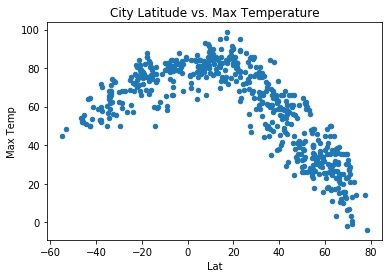

In [9]:
#latitude vs. temp plot
temp_frame.plot(kind = "scatter" , x = "Lat", y = "Max Temp")
plt.title("City Latitude vs. Max Temperature")
plt.show()

In the above cell we can observe that as we approach the equator the max temperature goes up and as we go away from the equator the max temperature goes down.

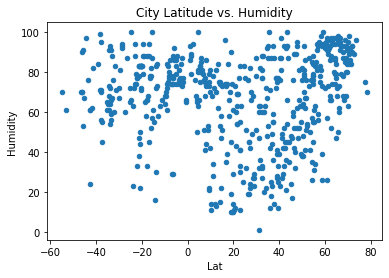

In [10]:
#Latitude vs. Humidity Plot
temp_frame.plot(kind= "scatter", x = "Lat", y = "Humidity")
plt.title("City Latitude vs. Humidity")
plt.show()

Here it is observed that there is no correlation between City Latitude and Humidity

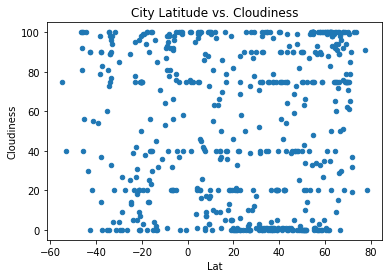

In [11]:
#Latitude vs. Cloudiness Plot
temp_frame.plot(kind= "scatter", x = "Lat", y = "Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.show()

Here it is observed that there is no correlation between City Latitude and Cloudiness

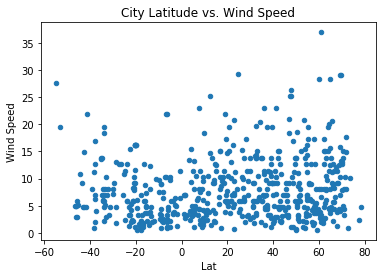

In [12]:
#Latitude vs. Wind Speed Plot
temp_frame.plot(kind= "scatter", x = "Lat", y = "Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.show()

Here it may be observed that there are more windy cities in the northern hemishphere but there are more cities in the northern hemisphere so a solid conclusion cannot be arrived at. 

Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
# North
north_temp = temp_frame.loc[temp_frame["Lat"]>0]
north_temp

,City,Country,Lat,Lng,Time,Max Temp,Humidity,Cloudiness,Wind Speed
5,Okhotsk,RU,59.38,143.30,1586636497,25.39,94,35,0.58
10,Kapaa,US,22.08,-159.32,1586636497,78.80,69,40,6.93
11,Bertoua,CM,4.58,13.68,1586636497,68.83,63,99,3.22
13,Saskylakh,RU,71.92,114.08,1586636498,0.82,90,19,14.94
14,Los Llanos de Aridane,ES,28.66,-17.92,1586636499,68.00,68,20,11.41
...,...,...,...,...,...,...,...,...,...
556,Jackson,US,42.42,-122.83,1586636406,68.00,45,20,4.70
557,Pontypridd,GB,51.60,-3.34,1586636574,60.80,76,0,8.05
558,Cumbitara,CO,1.65,-77.58,1586636574,69.80,88,75,6.93
559,The Valley,AI,18.22,-63.06,1586636572,86.00,66,20,10.29


In [14]:
# Southern Hemisphere
south_temp = temp_frame.loc[temp_frame["Lat"]<0]
south_temp

,City,Country,Lat,Lng,Time,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,-53.15,-70.92,1586636375,48.20,61,40,19.46
1,Hobart,AU,-42.88,147.33,1586636353,50.00,61,90,4.70
2,Avarua,CK,-21.21,-159.78,1586636496,84.20,83,96,5.82
3,Castro,BR,-24.79,-50.01,1586636497,60.94,66,13,2.33
4,Bredasdorp,ZA,-34.53,20.04,1586636497,68.00,68,100,5.82
...,...,...,...,...,...,...,...,...,...
529,Luganville,VU,-15.53,167.17,1586636568,75.20,100,40,4.90
542,Mananara,MG,-16.17,49.77,1586636570,76.50,82,23,8.75
544,Panguna,PG,-6.32,155.48,1586636570,73.38,77,91,0.98
550,Caála,AO,-12.85,15.56,1586636572,59.92,58,32,1.99


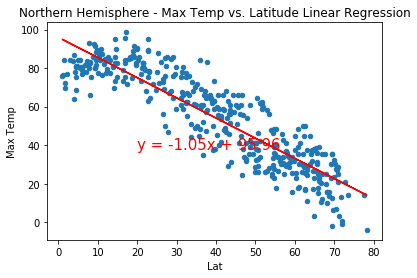

The r-squared is -0.8959934887924405


In [15]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
lat = north_temp["Lat"]
max_temp = north_temp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, max_temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_temp.plot(kind='scatter', x = "Lat", y = "Max Temp")
plt.plot(lat, regress_values, "r-")
plt.annotate(line_eq, (20,38), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))


Here it can be observed that as we move further away from the equator the Max Temp drops.

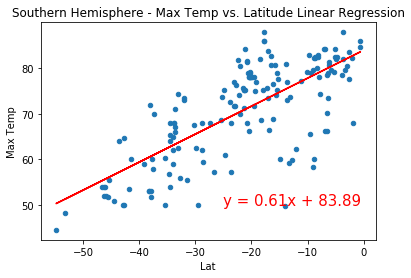

The r-squared is 0.7395032906153712


In [16]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_lat = south_temp["Lat"]
south_max_temp = south_temp["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_temp.plot(kind='scatter', x = "Lat", y = "Max Temp")
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, (-25,50), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))

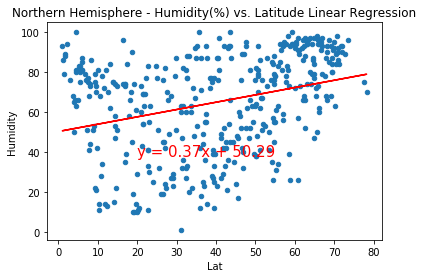

The r-squared is 0.30902160877363943


In [17]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
lat = north_temp["Lat"]
humid = north_temp["Humidity"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humid)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_temp.plot(kind='scatter', x = "Lat", y = "Humidity")
plt.plot(lat, regress_values, "r-")
plt.annotate(line_eq, (20,38), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))

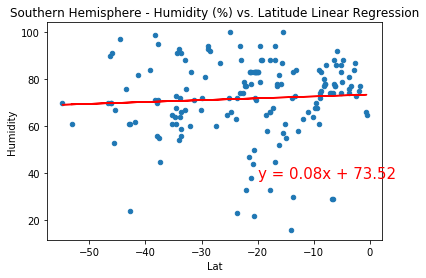

The r-squared is 0.06191181122216828


In [18]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
south_lat = south_temp["Lat"]
south_humid = south_temp["Humidity"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_temp.plot(kind='scatter', x = "Lat", y = "Humidity")
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, (-20,38), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))

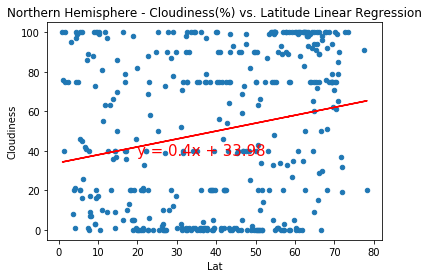

The r-squared is 0.21435282694446708


In [19]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
lat = north_temp["Lat"]
cloud = north_temp["Cloudiness"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_temp.plot(kind='scatter', x = "Lat", y = "Cloudiness")
plt.plot(lat, regress_values, "r-")
plt.annotate(line_eq, (20,38), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))

Here it can be observed that there is little to no correlation between Cloudiness and Latitude for the Northern Hemishpere

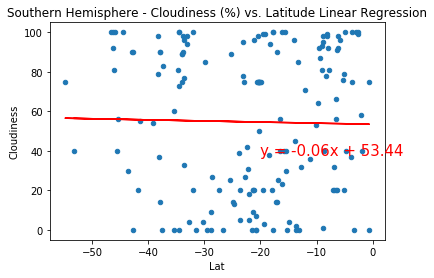

The r-squared is -0.019817195509005597


In [20]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
south_lat = south_temp["Lat"]
south_cloud = south_temp["Cloudiness"].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_temp.plot(kind='scatter', x = "Lat", y = "Cloudiness")
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, (-20,38), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))

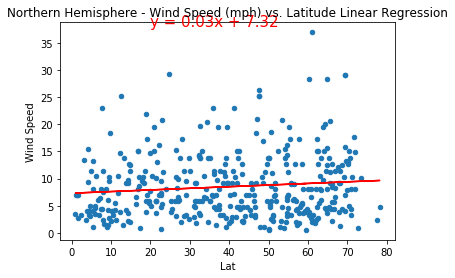

The r-squared is 0.10426664050748063


In [21]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
lat = north_temp["Lat"]
wind = north_temp["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
north_temp.plot(kind='scatter', x = "Lat", y = "Wind Speed")
plt.plot(lat, regress_values, "r-")
plt.annotate(line_eq, (20,38), fontsize = 15, color = "red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))

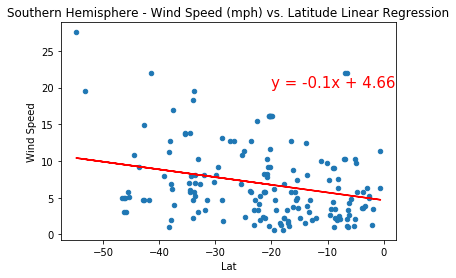

The r-squared is -0.26439781182585315


In [22]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
south_lat = south_temp["Lat"]
south_wind = south_temp["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
south_temp.plot(kind='scatter', x = "Lat", y = "Wind Speed")
plt.plot(south_lat, regress_values, "r-")
plt.annotate(line_eq, (-20,20), fontsize = 15, color = "red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.show()
print("The r-squared is " + str(rvalue))